In [4]:
from nltk import word_tokenize
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

In [9]:
dataset = pd.read_csv('Modulo9_TextMining\\Tweets_Mg.csv', encoding='utf-8')

In [10]:
dataset.head()

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Conta a quantidade de linhas de tweets neutros, positivos e negativos

In [11]:
dataset[dataset.Classificacao=='Neutro'].count()

Unnamed: 0                   2453
Created At                   2453
Text                         2453
Geo Coordinates.latitude      102
Geo Coordinates.longitude     102
User Location                1712
Username                     2453
User Screen Name             2453
Retweet Count                2453
Classificacao                2453
Observação                      0
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

In [12]:
dataset[dataset.Classificacao=='Positivo'].count()

Unnamed: 0                   3300
Created At                   3300
Text                         3300
Geo Coordinates.latitude        1
Geo Coordinates.longitude       1
User Location                2118
Username                     3300
User Screen Name             3300
Retweet Count                3300
Classificacao                3300
Observação                      1
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

In [13]:
dataset[dataset.Classificacao=='Negativo'].count()

Unnamed: 0                   2446
Created At                   2446
Text                         2446
Geo Coordinates.latitude        1
Geo Coordinates.longitude       1
User Location                1659
Username                     2446
User Screen Name             2446
Retweet Count                2446
Classificacao                2446
Observação                      0
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

In [14]:
dataset[dataset.Classificacao=='Neutro'].shape

(2453, 26)

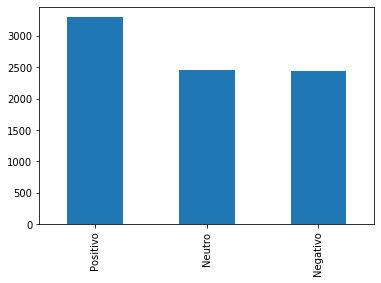

In [16]:
%matplotlib inline
dataset.Classificacao.value_counts().plot(kind='bar')

In [17]:
dataset.count()

Unnamed: 0                   8199
Created At                   8199
Text                         8199
Geo Coordinates.latitude      104
Geo Coordinates.longitude     104
User Location                5489
Username                     8199
User Screen Name             8199
Retweet Count                8199
Classificacao                8199
Observação                      1
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

Pré-processamento dos dados
* Remoção de linhas duplicadas
    - Problema na coleta dos dados
* Remove stopwords
* Faz stemming nos dados
* Remove caracteres indesejados como links, pontuação, etc..

In [18]:
dataset.Text.count()

8199

In [19]:
dataset.drop_duplicates(['Text'], inplace=True)

In [20]:
dataset.Text.count()

5765

Separando tweets e suas classes

In [55]:
tweets = dataset['Text']
classes = dataset['Classificacao']

Instala bibliotecas e baixa a base de dados

In [25]:
import nltk
nltk.download('stopwords')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tuffi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\Tuffi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping stemmers\rslp.zip.


True

Funções de pré-processamento de dados

In [27]:
def RemoveStopWords(instancia):
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [29]:
RemoveStopWords('José da Silva')

'José Silva'

In [33]:
def Stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    palavras=[]
    for w in instancia.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))

In [34]:
Stemming('Eu quero comer bolo de chocolate')

'eu quer com bol de chocolat'

In [40]:
Stemming(RemoveStopWords('Eu quero comer bolo de chocolate'))

'eu quer com bol chocolat'

In [41]:
def Limpeza_dados(instancia):
    #Remoção de links, pontos, vírgulas, ponto e vírgulas
    instancia = re.sub(r"http\S+", "", instancia).lower().replace(".","").replace(";","").replace("-","").replace(":","").replace(")","")
    return instancia

In [42]:
Limpeza_dados('Assista aqui o vídeo do Governador falando sobre a CEMIG https://www.uol.com.br :) ;)')

'assista aqui o vídeo do governador falando sobre a cemig   '

Aplica as 3 funções de pré-processamento dos dados

In [56]:
def Preprocessing(instancia):
    stemmer = nltk.stem.RSLPStemmer();
    instancia = re.sub(r"http\S+", "", instancia).lower().replace(".","").replace(";","").replace("-","").replace(":","").replace(")","")
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [stemmer.stem(i) for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

tweets = [Preprocessing(i) for i in tweets]

In [49]:
Preprocessing('Assista aqui o vídeo do Governador falando sobre a CEMIG https://www.uol.com.br :) ;)')

'assist aqu víde govern fal sobr cemig'

In [50]:
Preprocessing('Eu não gosto do partido, e também não votaria novamente nesse governante. Assista o vídeo aqui https://www.uol.com.br')

'gost partido, vot nov ness govern assist víde aqu'

Visualizando os tweets pré-processados

In [57]:
tweets[:50]

['���⛪ @ catedr sant antôni govern valadares/mg',
 '� @ govern valadares, min geral',
 '�� @ govern valadares, min geral',
 '���',
 '��� psol vai quest aument vere prefeit bh justiç poli est min',
 '" bom band morto" deput cab júli conden fic ineleg 10 ano poli est min',
 '"e 25% min diz torc tim nenhum,mesm dentr est atléticomg cruz pq?"',
 '"a gigantesc barb mal" destaqu cadern cult est min',
 '"bb govern min tr disput sobr depósit judiciais"',
 '"com vc bh fic pequena!" bel horizont (pron [bɛloɾiˈzõntʃi][10] capit est mg, áre aproximad 331 km²',
 '"daí gent visit govern valadares" "qu lug eh mãe?" "mg, gent um parent la" man ond q parent',
 '"é bonit bonita" #latergr #ibiturun #hom @ govern valadares, min geral',
 '"err desconhecido" mato! aliás, secret estad fazend tá assim mg precis dinh não, governador?',
 '"la la land cant estações" arras glob our est min',
 '"la la land cant estações" arras glob our est min',
 '"lo abusos, aun en el est má sólido, son min sord tard tempr estall

Criando o modelo

In [58]:
vectorizer = CountVectorizer(analyzer='word')

In [59]:
freq_tweets = vectorizer.fit_transform(tweets)
type(freq_tweets)

scipy.sparse.csr.csr_matrix

In [60]:
modelo = MultinomialNB()
modelo.fit(freq_tweets, classes)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [61]:
freq_tweets.shape

(5765, 5903)

In [62]:
freq_tweets.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Testando o modelo

In [63]:
testes = [
    'Esse governo está no início, vamos ver o que vai dar',
    'Estou muito feliz com o governo de Minas esse ano',
    'O estado de Minas Gerais decretou calamidade financeira',
    'A segurança desse país está deixando a desejar',
    'O governador de Minas é mais uma vez do PT'
]

In [64]:
testes

['Esse governo está no início, vamos ver o que vai dar',
 'Estou muito feliz com o governo de Minas esse ano',
 'O estado de Minas Gerais decretou calamidade financeira',
 'A segurança desse país está deixando a desejar',
 'O governador de Minas é mais uma vez do PT']

In [65]:
testes = [Preprocessing(i) for i in testes]

In [66]:
testes

['govern início, vam ver vai dar',
 'feliz govern min ano',
 'est min geral decret calam financ',
 'seguranç dess país deix desej',
 'govern min vez pt']

In [67]:
freq_testes = vectorizer.transform(testes)

In [68]:
freq_testes

<5x5903 sparse matrix of type '<class 'numpy.int64'>'
	with 23 stored elements in Compressed Sparse Row format>

In [69]:
freq_testes.shape

(5, 5903)

Fazendo a classificação do modelo

In [70]:
for t, c in zip(testes, modelo.predict(freq_testes)):
    print(t + ', ' + c)

govern início, vam ver vai dar, Neutro
feliz govern min ano, Neutro
est min geral decret calam financ, Negativo
seguranç dess país deix desej, Neutro
govern min vez pt, Negativo


Probabilidade de cada classe

In [71]:
print(modelo.classes_)
modelo.predict_proba(freq_testes).round(2)

['Negativo' 'Neutro' 'Positivo']


array([[0.12, 0.88, 0.  ],
       [0.02, 0.96, 0.02],
       [0.99, 0.01, 0.  ],
       [0.01, 0.98, 0.01],
       [0.67, 0.32, 0.  ]])

Função de tags de negações

In [72]:
def marque_negacao(texto):
    negacoes = ['não','not']
    negacao_detectada = False
    resultado = []
    palavras = texto.split()
    for p in palavras:
        p = p.lower()
        if negacao_detectada == True:
            p = p + '_NEG'
        if p in negacoes:
            negacao_detectada = True
        resultado.append(p)
    return " ".join(resultado)

In [73]:
marque_negacao('Eu gosto do partido, votaria novamente nesse governante!')

'eu gosto do partido, votaria novamente nesse governante!'

In [74]:
marque_negacao('Eu não gosto do partido, votaria novamente nesse governante!')

'eu não gosto_NEG do_NEG partido,_NEG votaria_NEG novamente_NEG nesse_NEG governante!_NEG'

Criando modelos com Pipelines

In [75]:
from sklearn.pipeline import Pipeline

In [77]:
pipeline_simples = Pipeline([
    ('counts', CountVectorizer()),
    ('classifier', MultinomialNB())
])

In [78]:
pipeline_negacoes = Pipeline([
    ('counts', CountVectorizer(tokenizer = lambda text: marque_negacao(text))),
    ('classifier', MultinomialNB())
])

In [79]:
pipeline_simples.fit(tweets, classes)

Pipeline(memory=None,
         steps=[('counts',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [80]:
pipeline_simples.steps

[('counts',
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                  dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                  lowercase=True, max_df=1.0, max_features=None, min_df=1,
                  ngram_range=(1, 1), preprocessor=None, stop_words=None,
                  strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                  tokenizer=None, vocabulary=None)),
 ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]

In [81]:
pipeline_negacoes.fit(tweets,classes)

Pipeline(memory=None,
         steps=[('counts',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function <lambda> at 0x000002AE6C6D6B70>,
                                 vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [82]:
pipeline_negacoes.steps

[('counts',
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                  dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                  lowercase=True, max_df=1.0, max_features=None, min_df=1,
                  ngram_range=(1, 1), preprocessor=None, stop_words=None,
                  strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                  tokenizer=<function <lambda> at 0x000002AE6C6D6B70>,
                  vocabulary=None)),
 ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]

Validando o modelo

In [83]:
resultados = cross_val_predict(pipeline_simples, tweets, classes, cv=10)

In [84]:
metrics.accuracy_score(classes,resultados)

0.8631396357328708

In [85]:
sentimento=['Positivo','Negativo','Neutro']
print(metrics.classification_report(classes,resultados,sentimento))

              precision    recall  f1-score   support

    Positivo       0.96      0.86      0.91      2840
    Negativo       0.77      0.90      0.83       951
      Neutro       0.80      0.85      0.82      1974

    accuracy                           0.86      5765
   macro avg       0.84      0.87      0.85      5765
weighted avg       0.87      0.86      0.87      5765



Matriz de confusão

In [86]:
print(pd.crosstab(classes,resultados,rownames=['Real'], colnames=['Predito'],margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo       852      91         8   951
Neutro         196    1674       104  1974
Positivo        64     326      2450  2840
All           1112    2091      2562  5765


Validando o modelo com a tag de negações

In [88]:
resultados_negacoes = cross_val_predict(pipeline_negacoes, tweets, classes, cv=10)

In [89]:
metrics.accuracy_score(classes,resultados_negacoes)

0.6993928881179532

Avaliando modelos com bigrams

In [90]:
vectorizer = CountVectorizer(ngram_range=(1,2))
freq_tweets = vectorizer.fit_transform(tweets)
modelo = MultinomialNB()
modelo.fit(freq_tweets,classes)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [91]:
resultados = cross_val_predict(modelo,freq_tweets,classes,cv=10)

In [92]:
metrics.accuracy_score(classes,resultados)

0.8659150043365135

In [96]:
tweets.head()

AttributeError: 'list' object has no attribute 'head'

In [99]:
modelo.predict([['Tuffi Saliba Neto']])

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


TypeError: Cannot cast array data from dtype('float64') to dtype('<U32') according to the rule 'safe'